# Autoencoders

The goal of this notebook is to explore the use of autoencoders for the purpose of dimensionality reduction. We will use the MNIST dataset to train a simple autoencoder and then use the encoder part of the network to reduce the dimensionality of the data. We will then use the reduced dimensionality data to train a simple classifier and compare the performance to the classifier trained on the original data.

In [1]:
import torchvision
from torchvision import transforms
import torch

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])
mnist_data = torchvision.datasets.MNIST('./data', download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data,
                                          batch_size=128,
                                          shuffle=True)

imageSample, label = next(iter(data_loader))     

In [2]:
from models.autoencoder import Autoencoder
import os.path

model = Autoencoder()
if os.path.isfile("checkpoints/autoencoder.pth"):
    model.load_state_dict(torch.load("checkpoints/autoencoder.pth"))
    print("Loaded model from checkpoint")

Loaded model from checkpoint


IntProgress(value=0, max=20)

[1] loss: 0.821
[6] loss: 0.818
[11] loss: 0.816
[16] loss: 0.814


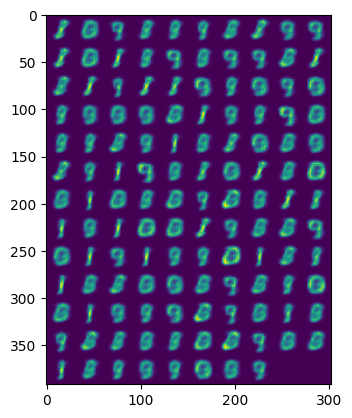

In [15]:
from ipywidgets import IntProgress
from IPython.display import display


#use SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# use loss for convuluational autoencoder
criterion = torch.nn.BCELoss()

epochs = 20

progress = IntProgress(min=0, max=epochs*len(data_loader)) # instantiate the bar
display(progress) # display the bar

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        progress.value += 1
    if epoch % 5 == 0:
        # print('[%d] loss: %.3f' %
        #       (epoch + 1, running_loss / 128))
        torch.save(model.state_dict(), "checkpoints/autoencoder.pth")

        running_loss = 0.0

import matplotlib.pyplot as plt
from torchvision.utils import make_grid

out = model(imageSample)
grid = make_grid(out, nrow=10)
plt.imshow(grid[0])



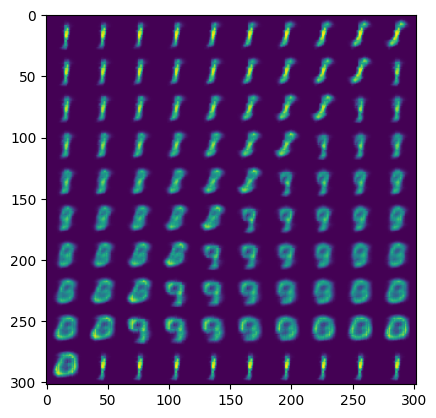

In [17]:

interpolate = torch.zeros(100, 2)

for x in range(10):
    for y in range(10):
        interpolate[x + y * 9, 0] = x / 10
        interpolate[x + y * 9, 1] = y / 10

out = model.decoder(model.latent2(interpolate).view(-1, 8, 2, 2))

grid = make_grid(out, nrow=10)
plt.imshow(grid[0])

In [16]:
torch.save(model.state_dict(), './checkpoints/autoencoder.pth')